# Handwritten digits

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

In [1]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Let's load the dataset first

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
#digits.data
#digits.target
#digits.frame
#digits.feature_names
digits.target_names
#digits.images
#digits.DESCR

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


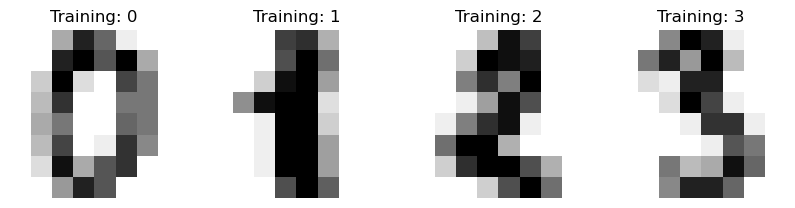

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Part 0

- First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

- Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  

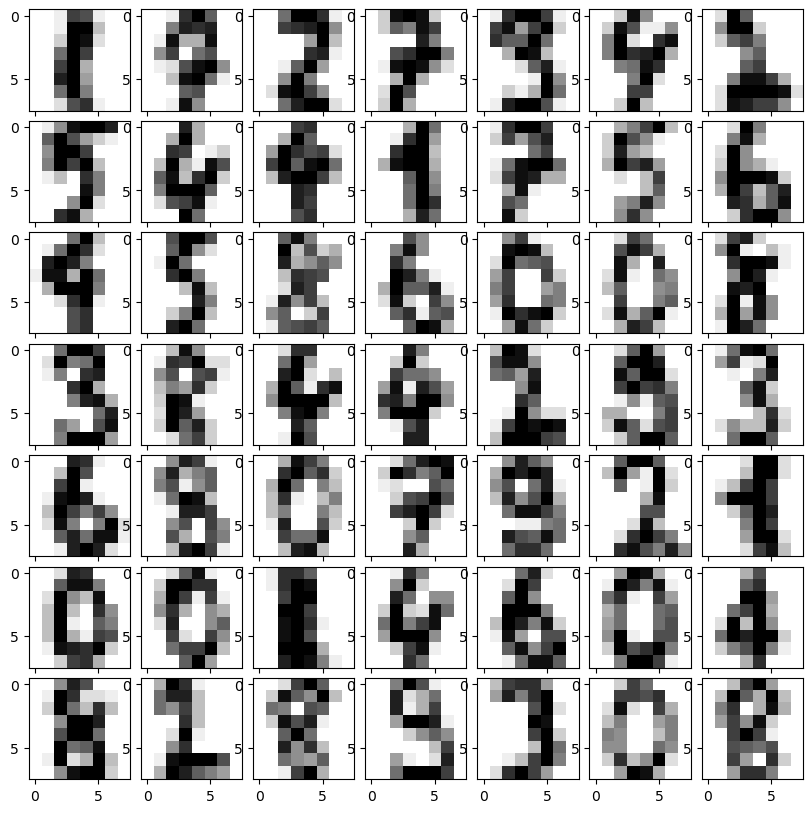

In [6]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')

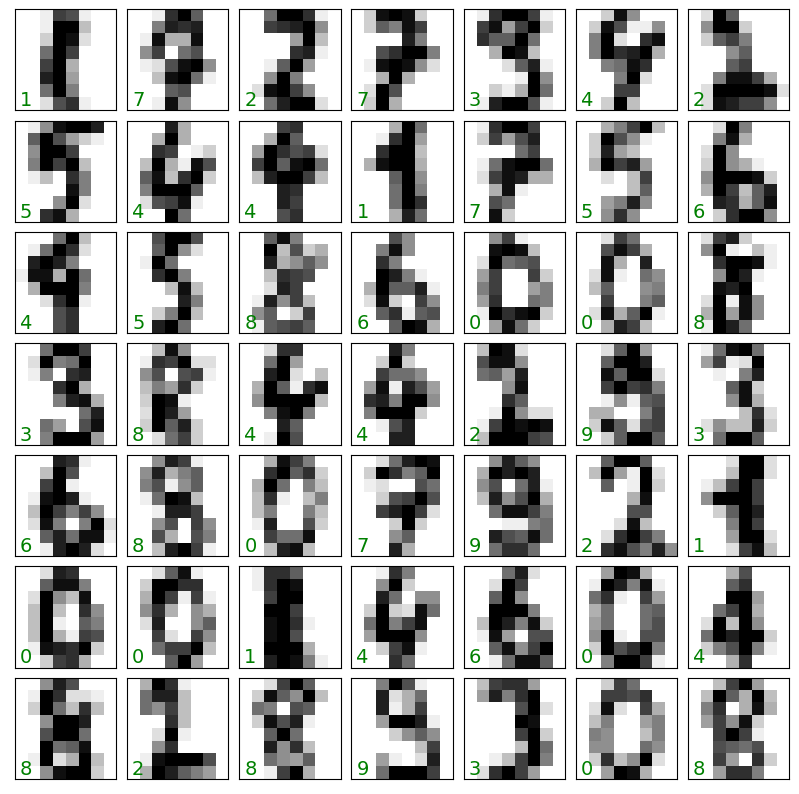

In [7]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

## Part 1 - Unsepervised Learning:
#### Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


- Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


C:\Users\utente\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\utente\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2) [163.39526445 -46.00448978 -97.23256557 ... -49.97218081  -0.96914751
  -9.41416423] [ 28.06891135  48.29792057  21.60527119 ... -24.93724342 -71.60775029
 -36.8662784 ]


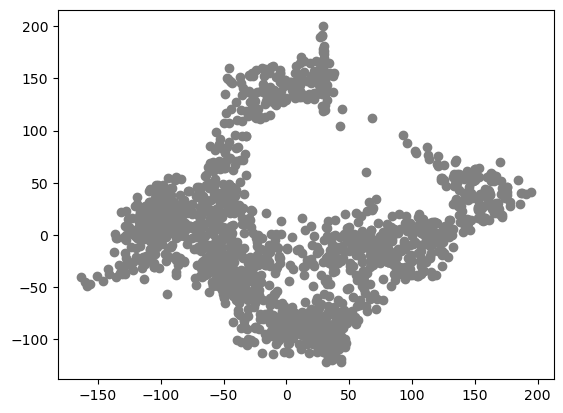

In [8]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
new_data = embedding.fit_transform(digits.data)

plt.scatter(new_data[:, 0], new_data[:, 1], c='gray')

print(new_data.shape,new_data[:, 0],new_data[:, 1])

## Part 2 - Supervised Learning:
#### Classification on Digits

Now we want to classify the dataset. 

- Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size = 0.20, random_state = 2)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

print(digits.data.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)
(1797, 64)


---
**Oss**
> `new_data_train` = training datasets, data from which the algorithm learn.

> `new_data_test` = test datasets, data used by algorithm to test what it has learned.

> *test_ size* = 0.20 means that 'new_data_train' (training dataset) is the 80% of 1797 (new_data.shape).
---

Let's consider the **Regression Learning**
- Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'sag',penalty = 'l2').fit(x_train,y_train)


#clf.predict_proba(digits.data[:2, :])
#clf.score(digits.data, digits.target)

C:\Users\utente\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

In [11]:
from sklearn.metrics import accuracy_score


y_true = y_test
y_test_pred = clf.predict(x_test)
accuracy_score = (y_true, y_test_pred)


#accuarcx_score
#print("accuracx_score = ", accuracx_score)
#accuracx_score = (x_true, x_pred, normalize=False)

- The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. 

C:\Users\utente\AppData\Local\Temp\ipykernel_1692\1595491697.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');


[[31  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


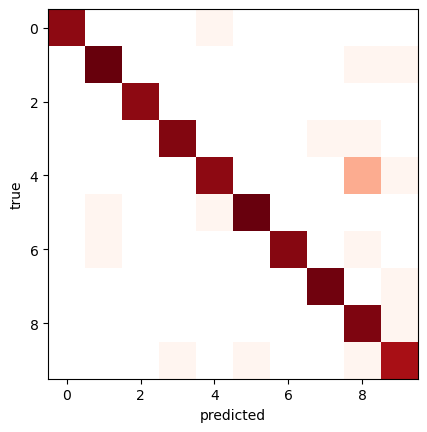

In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_true, y_test_pred))

plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');
plt.ylabel('true')
plt.xlabel('predicted');

- What are the digits that are more challenging to identify, does it make sense?

1) $Row-0$: We have 31 'zero' evaluated as 'zero' and 1 'zero' evaluated as 'four'

2) $Row-1$: We have 42 'one' evaluated as 'one', 1 'one' evaluated as ?eight' and 1 'one' evaluated as 'nine'

3)

.

.

.

And so on...

---
###############################################################################################################################

---

In the below cell I have repeat the **Part 2** using a different type of classifier:
- *KNeighborsClassifier*

C:\Users\utente\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\utente\AppData\Local\Temp\ipykernel_1692\893409758.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');


[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  1  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  1  0 27]]


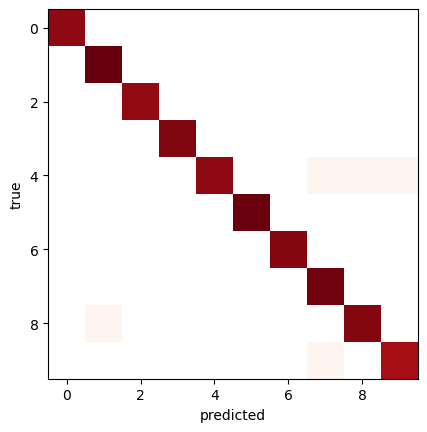

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
y_test_pred = clf.predict(x_test)

print(confusion_matrix(y_true, y_test_pred))

plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');
plt.ylabel('true')
plt.xlabel('predicted');

- *cross validation*

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  3  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 33  2]
 [ 0  0  0  0  0  1  0  1  0 26]]


C:\Users\utente\AppData\Local\Temp\ipykernel_1692\286358994.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');


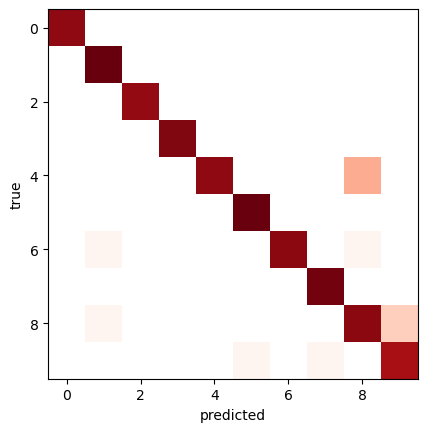

In [14]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print(confusion_matrix(y_true, y_test_pred))

plt.imshow(np.log(confusion_matrix(y_test, y_test_pred)), cmap='Reds', interpolation='nearest');
plt.ylabel('true')
plt.xlabel('predicted');